# Practice 1. Calculating centrality measures in weighted graphs

- Construct a directed weighted graph G from Edge.csv and Nodes.csv

- Calculating centrality measures (Degree, Betweenness, Closeness, Katz, Eigenvector, Pagerank)


In [19]:
# Import libraries
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
%matplotlib inline

## Loading Datasets:


In [20]:
#Read nodes and edges datasets
nodes = pd.read_csv('./data/Nodes.csv')
edges = pd.read_csv('./data/Edges.csv')

## Check nodes

In [21]:
nodes.head(5)

,id
0,s01
1,s02
2,s03
3,s04
4,s05


## Check edges

In [22]:
edges.head()
edges.shape

(51, 3)

In [23]:
#Collapse all edges of the same type between the same two nodes by summing their weights
edges = edges.groupby(['from', 'to'])['weight'].sum().reset_index()
edges.head(5)

,from,to,weight
0,s01,s02,22
1,s01,s03,22
2,s01,s04,21
3,s01,s15,20
4,s02,s01,23


## Create directed graph using edgelist


In [24]:
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.Graph())

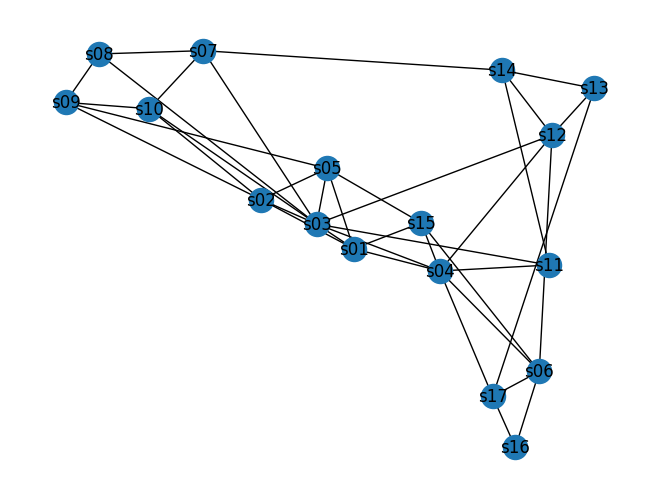

In [25]:
nx.draw(G,with_labels=True)
#nx.draw(G)

In [26]:
#Check edge data
G.edges.data()

EdgeDataView([('s01', 's02', {'weight': 23}), ('s01', 's03', {'weight': 21}), ('s01', 's04', {'weight': 21}), ('s01', 's15', {'weight': 22}), ('s01', 's05', {'weight': 1}), ('s02', 's03', {'weight': 21}), ('s02', 's09', {'weight': 1}), ('s02', 's10', {'weight': 5}), ('s02', 's05', {'weight': 21}), ('s03', 's04', {'weight': 23}), ('s03', 's05', {'weight': 1}), ('s03', 's08', {'weight': 2}), ('s03', 's10', {'weight': 2}), ('s03', 's11', {'weight': 1}), ('s03', 's12', {'weight': 1}), ('s03', 's07', {'weight': 1}), ('s04', 's06', {'weight': 1}), ('s04', 's11', {'weight': 22}), ('s04', 's12', {'weight': 3}), ('s04', 's17', {'weight': 4}), ('s04', 's15', {'weight': 1}), ('s15', 's05', {'weight': 21}), ('s15', 's06', {'weight': 4}), ('s09', 's05', {'weight': 2}), ('s09', 's08', {'weight': 23}), ('s09', 's10', {'weight': 21}), ('s10', 's07', {'weight': 21}), ('s08', 's07', {'weight': 21}), ('s11', 's14', {'weight': 1}), ('s12', 's06', {'weight': 2}), ('s12', 's13', {'weight': 21}), ('s12', 's1

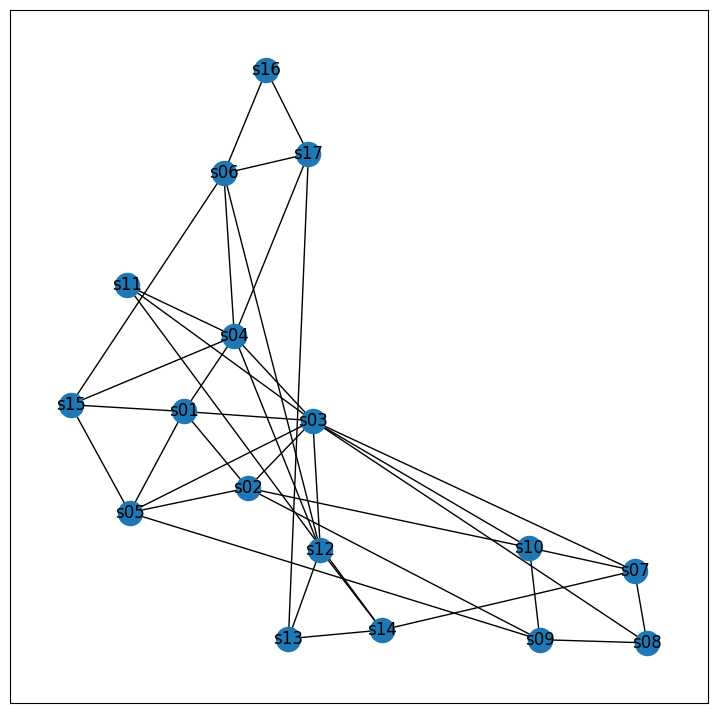

In [27]:
plt.figure(figsize=(9,9))
nx.draw_networkx(G)
plt.show()

## 1. Network Centrality Measures

(array([1., 3., 6., 0., 5., 0., 0., 1., 0., 1.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

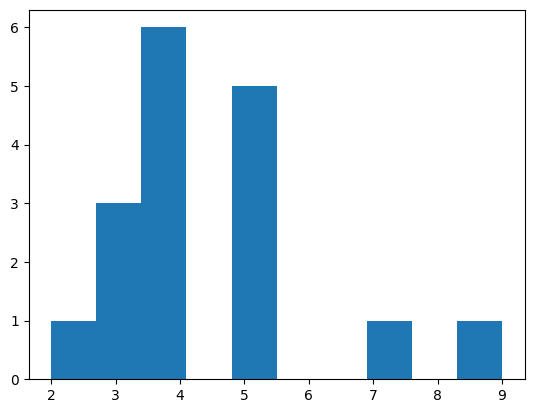

In [28]:
#Degree plot for undirected and weighted graph
degrees = [G.degree(n) for n in G.nodes()]

#degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

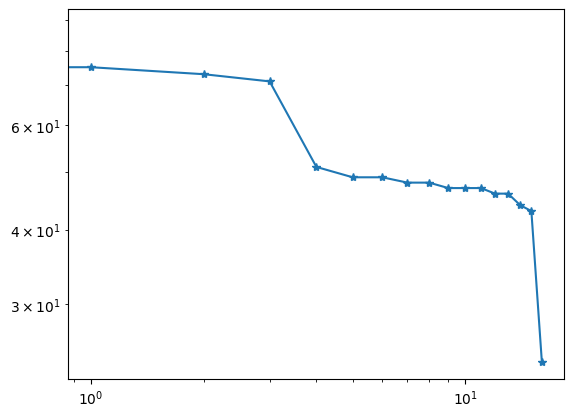

In [29]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [30]:
#Degree centrality for weighted graph
degree = G.degree(weight='weight')
max_degree = max(dict(degree).values())

degree_centrality_weighted = [deg/max_degree for deg in dict(degree).values()]

degree_centrality_weighted

[1.0,
 0.8068181818181818,
 0.8295454545454546,
 0.8522727272727273,
 0.5454545454545454,
 0.5340909090909091,
 0.5568181818181818,
 0.5227272727272727,
 0.5227272727272727,
 0.2727272727272727,
 0.5568181818181818,
 0.5795454545454546,
 0.5340909090909091,
 0.5,
 0.5340909090909091,
 0.5454545454545454,
 0.48863636363636365]

In [31]:
nx.degree_centrality(G)

{'s01': 0.3125,
 's02': 0.3125,
 's03': 0.5625,
 's04': 0.4375,
 's15': 0.25,
 's09': 0.25,
 's10': 0.25,
 's05': 0.3125,
 's08': 0.1875,
 's11': 0.1875,
 's12': 0.3125,
 's06': 0.3125,
 's17': 0.25,
 's16': 0.125,
 's07': 0.25,
 's14': 0.25,
 's13': 0.1875}

# Test1

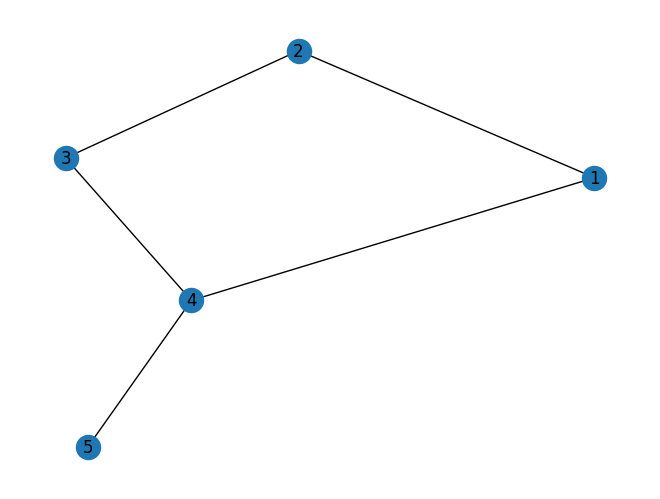

In [39]:
import networkx as nx
G_test = nx.Graph()
edges = [(1, 2, 1),(1, 4, 1), (2, 3, 2),(4, 3, 2),(4, 5, 2)]
G_test.add_weighted_edges_from(edges)
nx.draw(G_test, with_labels=True)
#nx.out_degree_centrality(G)

(array([2., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

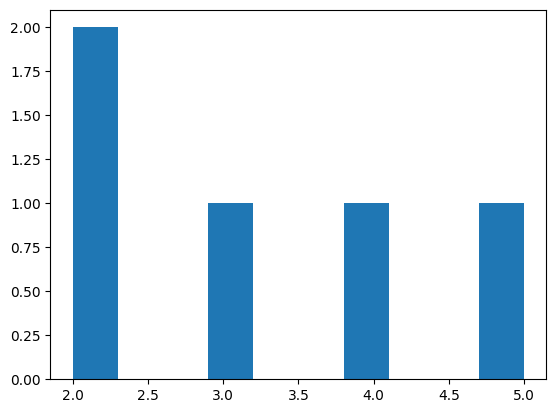

In [40]:
degrees = [G_test.degree(n, weight='weight') for n in G_test.nodes()]
plt.hist(degrees)

# Test2

{1: 0.3333333333333333,
 2: 0.6666666666666666,
 3: 0.3333333333333333,
 4: 0.6666666666666666}

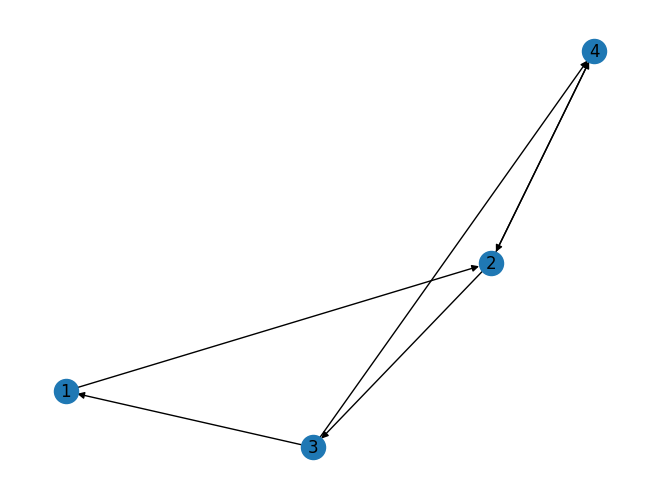

In [41]:
import networkx as nx
G_test2 = nx.DiGraph()
edges = [(1, 2, 2), 
         (2, 3, 1), (2, 4, 2),
         (3, 4, 1), (3, 1, 2), 
         (4, 2, 2)]
G_test2.add_weighted_edges_from(edges)
nx.draw(G_test2, with_labels=True)

nx.in_degree_centrality(G_test2)

## 2. Closeness centrality

In [42]:
nx.closeness_centrality(G)

{'s01': 0.5333333333333333,
 's02': 0.48484848484848486,
 's03': 0.6666666666666666,
 's04': 0.6153846153846154,
 's15': 0.48484848484848486,
 's09': 0.41025641025641024,
 's10': 0.47058823529411764,
 's05': 0.5161290322580645,
 's08': 0.45714285714285713,
 's11': 0.5161290322580645,
 's12': 0.5714285714285714,
 's06': 0.5,
 's17': 0.45714285714285713,
 's16': 0.35555555555555557,
 's07': 0.48484848484848486,
 's14': 0.47058823529411764,
 's13': 0.43243243243243246}

In [43]:
nx.closeness_centrality(G, distance='weight')

{'s01': 0.16326530612244897,
 's02': 0.13008130081300814,
 's03': 0.21621621621621623,
 's04': 0.16666666666666666,
 's15': 0.14414414414414414,
 's09': 0.14678899082568808,
 's10': 0.1553398058252427,
 's05': 0.1927710843373494,
 's08': 0.15384615384615385,
 's11': 0.1839080459770115,
 's12': 0.2077922077922078,
 's06': 0.1839080459770115,
 's17': 0.11347517730496454,
 's16': 0.03827751196172249,
 's07': 0.1797752808988764,
 's14': 0.1568627450980392,
 's13': 0.10256410256410256}

## 3. Betweenness centrality

In [44]:
nx.betweenness_centrality(G, weight='weight')

{'s01': 0.0,
 's02': 0.0,
 's03': 0.7583333333333333,
 's04': 0.325,
 's15': 0.0,
 's09': 0.11666666666666667,
 's10': 0.0,
 's05': 0.3333333333333333,
 's08': 0.0,
 's11': 0.125,
 's12': 0.5,
 's06': 0.2916666666666667,
 's17': 0.125,
 's16': 0.0,
 's07': 0.0,
 's14': 0.0,
 's13': 0.0}

In [45]:
#Sort for identifying most inflential nodes using betweenness centrality
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')

for node in sorted(betweenness_centrality_weighted, key=betweenness_centrality_weighted.get, reverse=True):
  print(node, betweenness_centrality_weighted[node])

s03 0.7583333333333333
s12 0.5
s05 0.3333333333333333
s04 0.325
s06 0.2916666666666667
s11 0.125
s17 0.125
s09 0.11666666666666667
s01 0.0
s02 0.0
s15 0.0
s10 0.0
s08 0.0
s16 0.0
s07 0.0
s14 0.0
s13 0.0


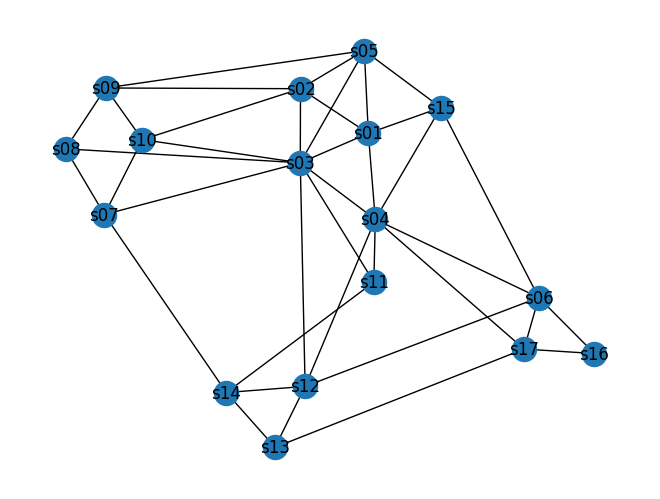

In [46]:
nx.draw(G, with_labels=True)

## 4. Eigenvector Centrality

In [47]:
nx.eigenvector_centrality(G, weight='weight',max_iter = 600)

{'s01': 0.5243879751840347,
 's02': 0.4234266643002834,
 's03': 0.4609728287014518,
 's04': 0.39415737973056825,
 's15': 0.267266335747827,
 's09': 0.06061597013618107,
 's10': 0.0843957773249976,
 's05': 0.24206579035422507,
 's08': 0.05344744462526895,
 's11': 0.142060019159748,
 's12': 0.04535228494306332,
 's06': 0.055568140658198546,
 's17': 0.055243182694160516,
 's16': 0.0378071954872536,
 's07': 0.053844817974830816,
 's14': 0.02919874249016756,
 's13': 0.025133401245443672}

## 5. PageRank Centrality

In [48]:
nx.pagerank(G, weight='weight')

{'s01': 0.08510275171090052,
 's02': 0.07036723548249191,
 's03': 0.07210878220106506,
 's04': 0.07793068159840727,
 's15': 0.05086993441701706,
 's09': 0.055565198429846537,
 's10': 0.05703894111148803,
 's05': 0.04910224124242256,
 's08': 0.05483671362647849,
 's11': 0.030132480983098633,
 's12': 0.05929092165421931,
 's06': 0.06038211879945627,
 's17': 0.05616702153345073,
 's16': 0.05330205121583224,
 's07': 0.0558770073826599,
 's14': 0.05866910324143484,
 's13': 0.05325681536973059}

## 6. Katz Centrality

In [51]:
nx.katz_centrality(G)

{'s01': 0.26618993626002696,
 's02': 0.25852148990193397,
 's03': 0.34789011195803876,
 's04': 0.30380429431829625,
 's15': 0.23327053802129114,
 's09': 0.22137718593506467,
 's10': 0.23134469376305405,
 's05': 0.25869656644292643,
 's08': 0.20549255350345041,
 's11': 0.21263834616088179,
 's12': 0.2565554334351372,
 's06': 0.24429808778427545,
 's17': 0.21748417879464044,
 's16': 0.17214990077487388,
 's07': 0.22594164043918732,
 's14': 0.21497249250773137,
 's13': 0.19487287897431288}

# Practice 2.  Implement manually centralities in python and comparing with the NetworkX formulars

Input: an adjacency matrix.

Output: 

1. Return a list or vector of centrality values

2. Comparing the manual results with NetworkX

## Creating a Graph:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
              [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
mat_size = len(A)
print("Size Graph: ", mat_size,":")
print(A)

Graph of Size 9 :
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


## 1. Degree Centrality:

In [4]:
temp = A.copy()


def sum_of_row(graph, a):
    degSum = 0
    for column in range(mat_size):
        degSum += graph[a,column]
    return degSum
        
# Degree Centrality:
def degreeCentrality(a):
    degSum = sum_of_row(temp, a)
    result = (degSum/(mat_size-1))
    
    return result

In [5]:
DCValues = [degreeCentrality(a) for a in range(mat_size)]
print("Degree Centralities of the Graph: \n", DCValues)

Degree Centralities of the Graph: 
 [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]


## Comparing the Computed values with the Networkx solutions:


In [6]:
H = nx.from_numpy_array(A)
DCValues = [degreeCentrality(a) for a in range(mat_size)]
print("Calculated Degree Centralities: \n", DCValues)
print("\nNetworkX Degree Centralities: \n", nx.degree_centrality(H))

Calculated Degree Centralities: 
 [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]

NetworkX Degree Centralities: 
 {0: 0.375, 1: 0.25, 2: 0.375, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.375, 8: 0.125}


## 2. Closeness Centrality:

In [7]:
# calculate the shortest path:
import networkx as nx
import numpy as np

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_array(temp)

# Creating a blank Step Matrix 
step_mat = np.zeros((mat_size,mat_size))
# Calculate between nodes and save it in the step matrix:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

def closenessCentrality(b):
    closeSum = sum_of_row(step_mat, b)
    
    # dividing the (n-1) nodes
    result = ((mat_size-1)/closeSum)
    
    return result

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [8]:
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Closeness Centralities: \n", closenessCentralityValues)

Closeness Centralities: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]


## Comparing the Computed Closeness Centrality Values  with the Networkx solutions:

In [9]:
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Calculated Closeness: \n", closenessCentralityValues)
print("\nNetworkX Closeness: \n", nx.closeness_centrality(H))

Calculated Closeness: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]

NetworkX Closeness: 
 {0: 0.47058823529411764, 1: 0.34782608695652173, 2: 0.47058823529411764, 3: 0.6153846153846154, 4: 0.6153846153846154, 5: 0.6153846153846154, 6: 0.5, 7: 0.47058823529411764, 8: 0.34782608695652173}


## 3. Eigenvector Centrality:


In [67]:
# Calculating Eigens of the graph
w,v = np.linalg.eig(temp)
# Index of the Maximum Absolute Eigen Value of the graph
index = (np.abs(max(w, key=abs))).argmax()

# Eigen Vector of the maximum Eigen Value
eigenCentralityValues = [v[ecv,index] for ecv in range(mat_size)]

print("Eigen Vector Centralities of the Graph: \n", eigenCentralityValues)

Eigen Vector Centralities of the Graph: 
 [-0.19574879570918574, -0.11168370323986773, -0.19574879570918563, -0.37874802533567953, -0.468085476310422, -0.468085476310422, -0.4099793895329527, -0.38402038384110426, -0.11695606174529256]


## Comparision

In [11]:
eigenCentralityValues = [v[ecv,index] for ecv in range(mat_size)]
print("Calculated Eigen Vector Centralities: \n", eigenCentralityValues)
print("\nNetworkX Eigen Vector Centralities: \n", nx.eigenvector_centrality(H))

Calculated Eigen Vector Centralities: 
 [-0.19574879570918574, -0.11168370323986773, -0.19574879570918563, -0.37874802533567953, -0.468085476310422, -0.468085476310422, -0.4099793895329527, -0.38402038384110426, -0.11695606174529256]

NetworkX Eigen Vector Centralities: 
 {0: 0.19575404149708636, 1: 0.11168805432964159, 2: 0.19575404149708636, 3: 0.3787510773733839, 4: 0.4680839101306904, 5: 0.4680839101306904, 6: 0.4099765880693859, 7: 0.38401792296324566, 8: 0.11695489991950335}


## 4.  Betweenness Centralities

In [50]:
# Using NetworkX only to calculate the shortest path:
import networkx as nx

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_array(temp)

In [51]:
step_mat = np.zeros((mat_size,mat_size))
step_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

pow_size = int(step_mat.max())+1
A_powers = [np.linalg.matrix_power(A,m) for m in range(1,pow_size)]

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


In [53]:
A_powers
sigma = np.zeros((mat_size,mat_size))
sigma

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [54]:
min_lengths = np.zeros((mat_size,mat_size))
min_lengths

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [55]:
for i in range(mat_size):
    for j in range(mat_size):
        for x in range(pow_size-1):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break

In [56]:
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(mat_size)
    B[:,j] = np.zeros(mat_size)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]] ##[1,2,3,4,5]]
    B_sigma = np.zeros((mat_size,mat_size))
    B_min_lengths = np.zeros((mat_size,mat_size))
    for i in range(mat_size):
        for k in range(mat_size):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)

In [57]:
def betweenness_centrality(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(mat_size):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [58]:
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Betweenness Centralities of the Graph: \n", betweennessCentralityValues)

Betweenness Centralities of the Graph: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]


## Comparision

In [59]:
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Calculated Betweenness Centralities: \n", betweennessCentralityValues)
print("\nNetworkX Betweenness Centralities: \n", nx.betweenness_centrality(H, normalized=False).values())

Calculated Betweenness Centralities: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

NetworkX Betweenness Centralities: 
 dict_values([3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0])


## 5. Katz Centrality

In [180]:
# Converting it to a NetworkX Graph:
G_temp = nx.from_numpy_array(temp)
#nx.draw(temp_Graph)

In [181]:
#default value
alpha = 1
beta = 1
max_iter = 1000
tol = 1e-06
weight = None

nx.katz_centrality(G_temp)

{0: 0.32231142220857734,
 1: 0.2893349955974206,
 2: 0.32231142220857734,
 3: 0.36274091133772884,
 4: 0.367029925075744,
 5: 0.367029925075744,
 6: 0.3577487271446689,
 7: 0.33405349846458715,
 8: 0.26064758272427896}

In [184]:
from math import sqrt
b = dict.fromkeys(G_temp,float(beta))

def Katz(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1.0e-6):
    nnodes = G.number_of_nodes()
    dict_v = dict([(n,0) for n in G])
    b = dict.fromkeys(G,float(beta))
    for i in range(max_iter):
        xlast = dict_v
        dict_v = dict.fromkeys(xlast, 0)
        # y^T = anfa * x^T A - b
        for n in dict_v:
            for nbr in G[n]:
                dict_v[nbr] += xlast[n] * G[n][nbr].get(weight, 1)
        for n in dict_v:
            dict_v[n] = alpha*dict_v[n] + b[n]
        err = sum([abs(dict_v[n]-xlast[n]) for n in dict_v])
        if err < nnodes*tol:
            # normalize 
            s = 1.0/sqrt(sum(v**2 for v in dict_v.values()))
            s= np.round(s,3)
            for n in dict_v:
                dict_v[n] *= s
                dict_v[n] = np.round(dict_v[n],3)
            return dict_v
Katz(G_temp)

{0: 0.322,
 1: 0.289,
 2: 0.322,
 3: 0.363,
 4: 0.367,
 5: 0.367,
 6: 0.358,
 7: 0.334,
 8: 0.261}

## Comparision:

In [185]:
print("Katz Centralities of the Graph: \n", Katz(G))
print("Katz Centralities NetworkX: \n", nx.katz_centrality(G))

Katz Centralities of the Graph: 
 {0: 0.322, 1: 0.289, 2: 0.322, 3: 0.363, 4: 0.367, 5: 0.367, 6: 0.358, 7: 0.334, 8: 0.261}
Katz Centralities NetworkX: 
 {0: 0.32231142220857734, 1: 0.2893349955974206, 2: 0.32231142220857734, 3: 0.36274091133772884, 4: 0.367029925075744, 5: 0.367029925075744, 6: 0.3577487271446689, 7: 0.33405349846458715, 8: 0.26064758272427896}


## 6. Pagerank Centrality

In [146]:
nx.pagerank(G, weight='weight')

pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

{0: 0.11085242532970185,
 1: 0.07948362274014723,
 2: 0.11085242532970185,
 3: 0.13645209029225677,
 4: 0.13404444415308828,
 5: 0.13404444415308828,
 6: 0.14313616991007672,
 7: 0.10405142282202429,
 8: 0.04708295526991471}

In [175]:
# Converting it to a NetworkX Graph:
G_temp = nx.from_numpy_array(temp)
#nx.draw(temp_Graph)

In [188]:
import numpy as np
import scipy as sp
import scipy.sparse 

def mypagerank(G,alpha=0.85, max_iter=100,tol=1.0e-6):
    
    N = len(G)
    nodelist = list(G)
    A = nx.to_scipy_sparse_array(G, nodelist=nodelist, dtype=float)
    S = A.sum(axis=1)
    S[S != 0] = 1.0 / S[S != 0]
    Q = sp.sparse.csr_array(sp.sparse.spdiags(S.T, 0, *A.shape))
    A = Q @ A
    # initial vector
    x = np.repeat(1.0 / N, N)
    p = np.repeat(1.0 / N, N)
    
    dangling_weights = p
    is_dangling = np.where(S == 0)[0]
    for _ in range(max_iter):
        xlast = x
        x = alpha * (x @ A + sum(x[is_dangling]) * dangling_weights) + (1 - alpha) * p
        #l1 norm
        err = np.absolute(x - xlast).sum()
        if err < N * tol:
            return dict(zip(nodelist, map(float, np.round(x,4))))

In [189]:
mypagerank(G)

{0: 0.1109,
 1: 0.0795,
 2: 0.1109,
 3: 0.1365,
 4: 0.134,
 5: 0.134,
 6: 0.1431,
 7: 0.1041,
 8: 0.0471}

## Comparision

In [190]:
print("pagerank Centralities of the Graph: \n",mypagerank(G))
print("pagerank Centralities NetworkX: \n", nx.pagerank(G, weight='weight'))

pagerank Centralities of the Graph: 
 {0: 0.1109, 1: 0.0795, 2: 0.1109, 3: 0.1365, 4: 0.134, 5: 0.134, 6: 0.1431, 7: 0.1041, 8: 0.0471}
pagerank Centralities NetworkX: 
 {0: 0.11085242532970185, 1: 0.07948362274014723, 2: 0.11085242532970185, 3: 0.13645209029225677, 4: 0.13404444415308828, 5: 0.13404444415308828, 6: 0.14313616991007672, 7: 0.10405142282202429, 8: 0.04708295526991471}
